In [2]:
!pip install scipy matplotlib numpy torch

Epoch [200/1000], Loss: 0.0048
Epoch [400/1000], Loss: 0.0023
Epoch [600/1000], Loss: 0.0015
Epoch [800/1000], Loss: 0.0011
Epoch [1000/1000], Loss: 0.0009


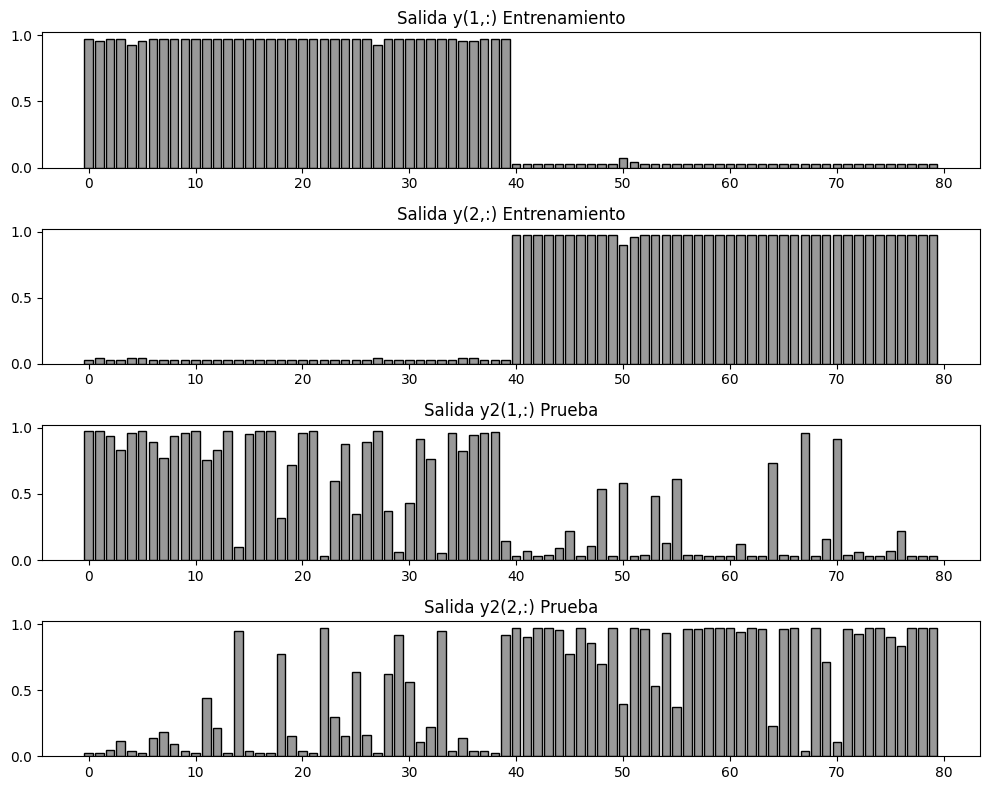

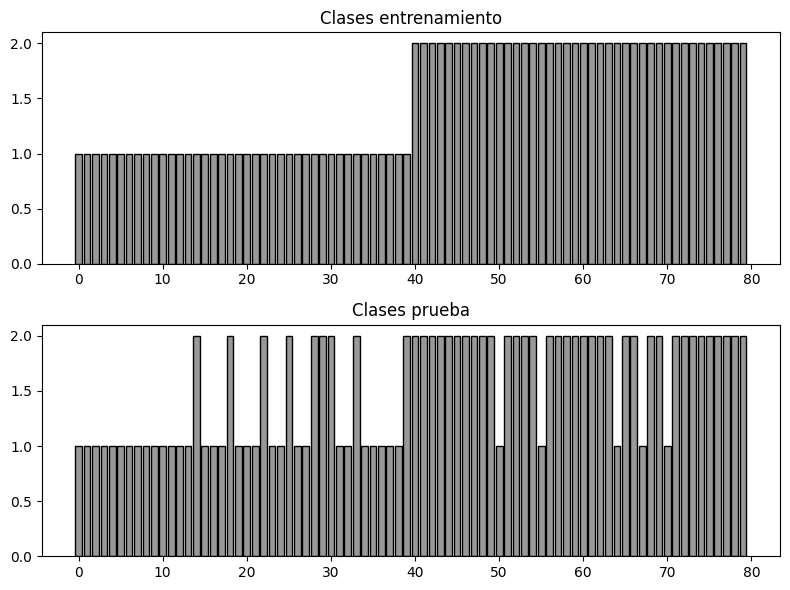

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np

# ==============================
# 1 Cargar datos
# ==============================
cat_data = sio.loadmat('catData_w.mat')
dog_data = sio.loadmat('dogData_w.mat')

cat_wave = cat_data['cat_wave']
dog_wave = dog_data['dog_wave']

# Concatenar datos
CD = np.concatenate((dog_wave, cat_wave), axis=1)

# Conjuntos de entrenamiento y prueba
x_train = np.concatenate((dog_wave[:, :40], cat_wave[:, :40]), axis=1)
x_test = np.concatenate((dog_wave[:, 40:80], cat_wave[:, 40:80]), axis=1)

# Etiquetas (igual que en MATLAB)
label = np.array([
    np.concatenate((np.ones(40), np.zeros(40))),
    np.concatenate((np.zeros(40), np.ones(40)))
])

# Convertir a tensores
x_train_t = torch.tensor(x_train, dtype=torch.float32).T  # [muestras, features]
x_test_t = torch.tensor(x_test, dtype=torch.float32).T
label_t = torch.tensor(label.T, dtype=torch.float32)      # [muestras, clases]

# ==============================
# 2 Definir la red neuronal
# ==============================
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.hidden = nn.Linear(x_train.shape[0], 10)  # igual que patternnet(10)
        self.output = nn.Linear(10, 2)
        self.tansig = nn.Tanh()

    def forward(self, x):
        x = self.tansig(self.hidden(x))
        x = torch.sigmoid(self.output(x))
        return x

net = Net()

# ==============================
# 3 Entrenamiento
# ==============================
criterion = nn.MSELoss()            # Igual que perform(net, ...)
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

epochs = 1000
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = net(x_train_t)
    loss = criterion(outputs, label_t)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 200 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

# ==============================
# 4 Evaluación
# ==============================
y_train = net(x_train_t).detach().numpy().T
y_test = net(x_test_t).detach().numpy().T

# Convertir a clases (vec2ind)
classes_train = np.argmax(y_train, axis=0) + 1
classes_test = np.argmax(y_test, axis=0) + 1
# ==============================
# 5 Gráficas
# ==============================
plt.figure(figsize=(10, 8))
plt.subplot(4, 1, 1)
plt.bar(range(len(y_train[0])), y_train[0], color=[.6, .6, .6], edgecolor='k')
plt.title('Salida y(1,:) Entrenamiento')

plt.subplot(4, 1, 2)
plt.bar(range(len(y_train[1])), y_train[1], color=[.6, .6, .6], edgecolor='k')
plt.title('Salida y(2,:) Entrenamiento')

plt.subplot(4, 1, 3)
plt.bar(range(len(y_test[0])), y_test[0], color=[.6, .6, .6], edgecolor='k')
plt.title('Salida y2(1,:) Prueba')

plt.subplot(4, 1, 4)
plt.bar(range(len(y_test[1])), y_test[1], color=[.6, .6, .6], edgecolor='k')
plt.title('Salida y2(2,:) Prueba')
plt.tight_layout()
plt.show()

# Segunda figura (clasificación)
plt.figure(figsize=(8, 6))
plt.subplot(2, 1, 1)
plt.bar(range(len(classes_train)), classes_train, color=[.6, .6, .6], edgecolor='k')
plt.title('Clases entrenamiento')

plt.subplot(2, 1, 2)
plt.bar(range(len(classes_test)), classes_test, color=[.6, .6, .6], edgecolor='k')
plt.title('Clases prueba')
plt.tight_layout()
plt.show()